<a href="https://colab.research.google.com/github/PochampellyDeekshitha/MachineLearning/blob/main/WEEK7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Implement K- means algorithm to find the clusters. (also demonstrate with elbow method)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

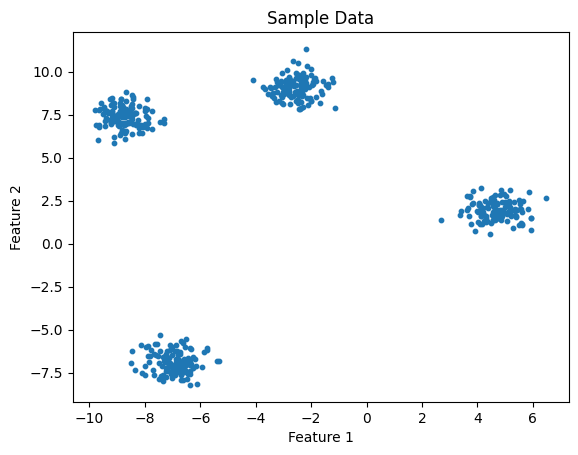

In [17]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

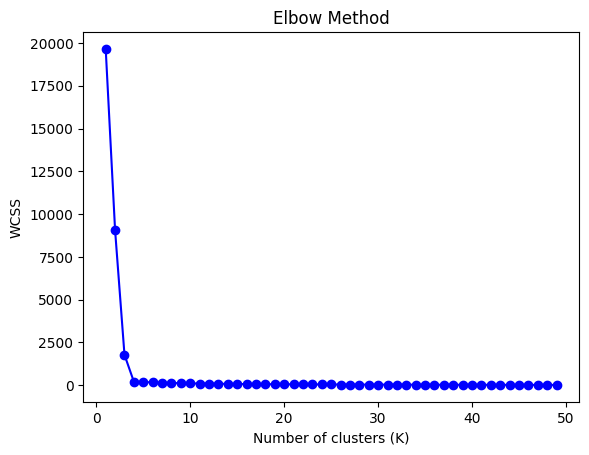

In [7]:
wcss = []
K_range = range(1, 50)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(K_range, wcss, 'bo-')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.show()

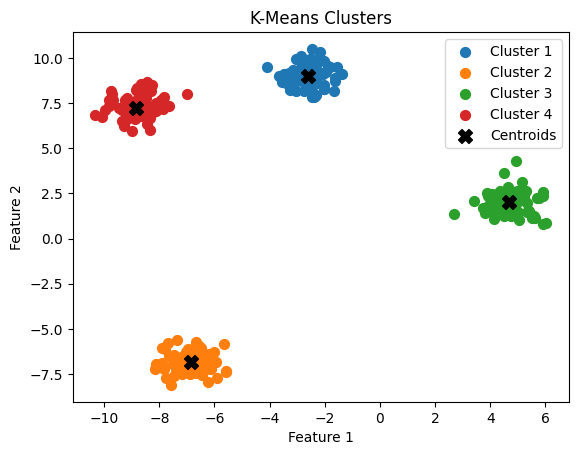

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label='Centroids')
plt.title("K-Means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

2. Implement all the clustering distance measures (similarity measures)
I. Euclidean distance
ii. Manhattan distance
iii. cosine similarity
iv. minkowski
v. jaccard index

In [18]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski, jaccard

In [19]:
x = np.array([1, 2, 3, 4])
y = np.array([4, 5, 6, 7])
# For Jaccard, we need binary arrays
x_bin = np.array([1, 0, 1, 1])
y_bin = np.array([1, 1, 0, 1])

In [20]:
eu_dist = euclidean(x, y)
print("Euclidean Distance:", eu_dist)

Euclidean Distance: 6.0


In [21]:
manhattan_dist = cityblock(x, y)
print("Manhattan Distance:", manhattan_dist)

Manhattan Distance: 12


In [22]:
cos_sim = 1 - cosine(x, y)
print("Cosine Similarity:", cos_sim)

Cosine Similarity: 0.9759000729485332


In [23]:
mink_dist = minkowski(x, y, p=3)  # Example p=3
print("Minkowski Distance (p=3):", mink_dist)

Minkowski Distance (p=3): 4.762203155904598


In [24]:
jaccard_sim = 1 - jaccard(x_bin, y_bin)
print("Jaccard Similarity:", jaccard_sim)

Jaccard Similarity: 0.5


In [26]:
import numpy as np
from scipy.spatial.distance import cdist, pdist, squareform

In [27]:
# Sample dataset (4 points, 3 features)
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [1, 0, 1]
])
# For Jaccard, we need binary vectors
X_bin = np.array([
    [1, 0, 1],
    [1, 1, 0],
    [0, 1, 1],
    [1, 0, 0]
])

In [29]:
euclidean_matrix = squareform(pdist(X, metric='euclidean'))
print("Euclidean Distance Matrix:\n", euclidean_matrix)

manhattan_matrix = squareform(pdist(X, metric='cityblock'))
print("\nManhattan Distance Matrix:\n", manhattan_matrix)

cosine_dist = squareform(pdist(X, metric='cosine'))
cosine_similarity_matrix = 1 - cosine_dist
print("\nCosine Similarity Matrix:\n", cosine_similarity_matrix)

minkowski_matrix = squareform(pdist(X, metric='minkowski', p=3))
print("\nMinkowski Distance Matrix (p=3):\n", minkowski_matrix)

jaccard_dist = squareform(pdist(X_bin, metric='jaccard'))
jaccard_similarity_matrix = 1 - jaccard_dist
print("\nJaccard Similarity Matrix:\n", jaccard_similarity_matrix)

Euclidean Distance Matrix:
 [[ 0.          5.19615242 10.39230485  2.82842712]
 [ 5.19615242  0.          5.19615242  7.68114575]
 [10.39230485  5.19615242  0.         12.80624847]
 [ 2.82842712  7.68114575 12.80624847  0.        ]]

Manhattan Distance Matrix:
 [[ 0.  9. 18.  4.]
 [ 9.  0.  9. 13.]
 [18.  9.  0. 22.]
 [ 4. 13. 22.  0.]]

Cosine Similarity Matrix:
 [[1.         0.97463185 0.95941195 0.75592895]
 [0.97463185 1.         0.99819089 0.80582296]
 [0.95941195 0.99819089 1.         0.81227693]
 [0.75592895 0.80582296 0.81227693 1.        ]]

Minkowski Distance Matrix (p=3):
 [[ 0.          4.32674871  8.65349742  2.5198421 ]
 [ 4.32674871  0.          4.32674871  6.51868392]
 [ 8.65349742  4.32674871  0.         10.74337071]
 [ 2.5198421   6.51868392 10.74337071  0.        ]]

Jaccard Similarity Matrix:
 [[1.         0.33333333 0.33333333 0.5       ]
 [0.33333333 1.         0.33333333 0.5       ]
 [0.33333333 0.33333333 1.         0.        ]
 [0.5        0.5        0.        

3.Implement hierarchical clustering
I. agglomerative (BIRCH and CHAMELEON)
ii. Divisive

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, Birch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

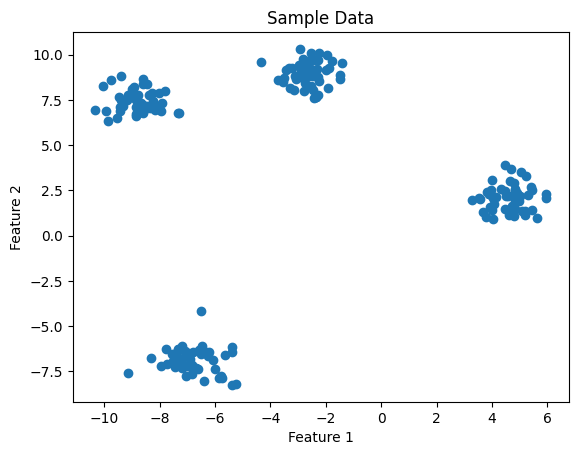

In [31]:
X, y_true = make_blobs(n_samples=200, centers=4, cluster_std=0.7, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

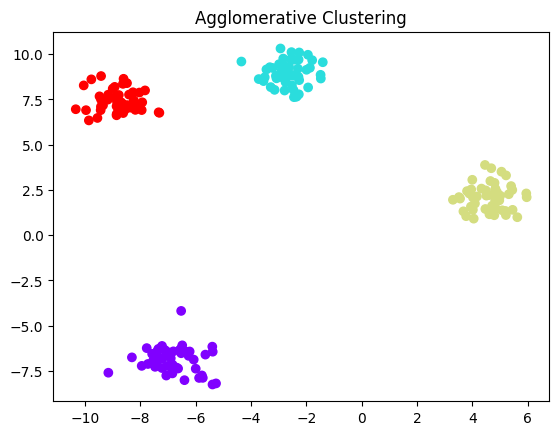

In [36]:
agg_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels_agg = agg_cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.show()

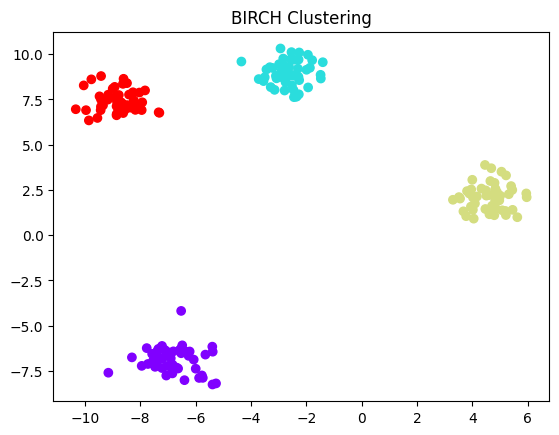

In [33]:
# BIRCH clustering
birch_model = Birch(n_clusters=4)
labels_birch = birch_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_birch, cmap='rainbow')
plt.title("BIRCH Clustering")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


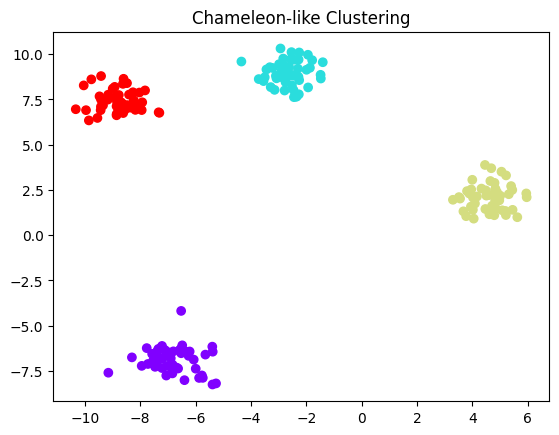

In [34]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
agg_chameleon = AgglomerativeClustering(n_clusters=4, linkage='ward', connectivity=connectivity)
labels_chameleon = agg_chameleon.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_chameleon, cmap='rainbow')
plt.title("Chameleon-like Clustering")
plt.show()

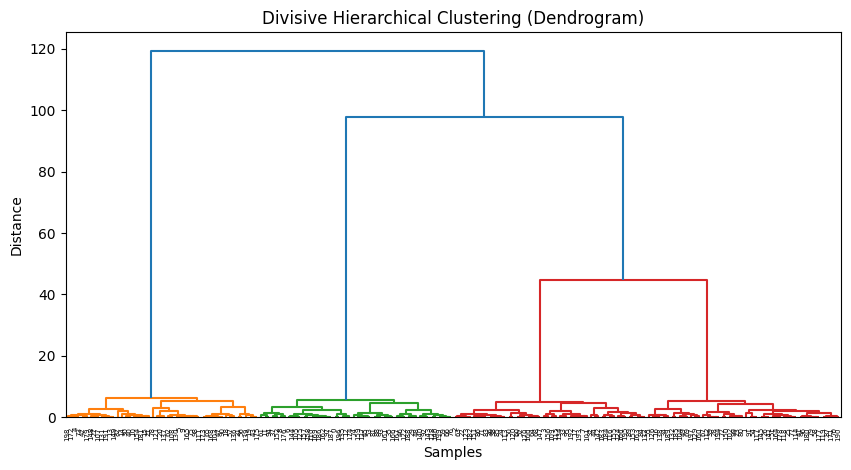

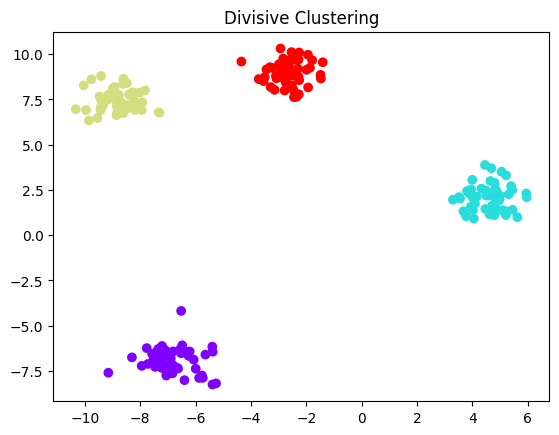

In [35]:
Z = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Divisive Hierarchical Clustering (Dendrogram)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
labels_divisive = fcluster(Z, t=4, criterion='maxclust')
plt.scatter(X[:, 0], X[:, 1], c=labels_divisive, cmap='rainbow')
plt.title("Divisive Clustering")
plt.show()

4.Implement Types of Linkages
Single Linkage
Complete Linkage
Average Linkage
Ward's Linkage
Centroid-Linkage

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

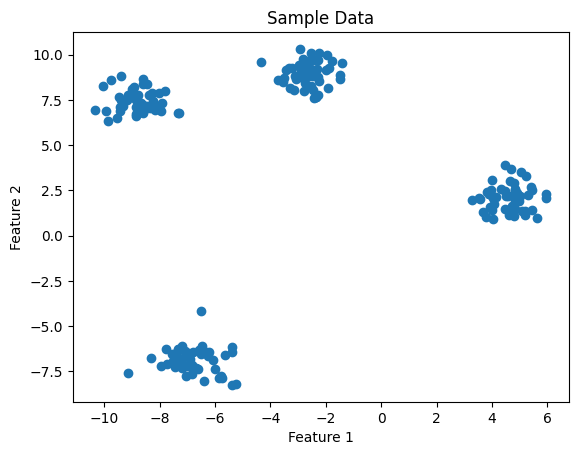

In [38]:
X, y_true = make_blobs(n_samples=200, centers=4, cluster_std=0.7, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [39]:
def hierarchical_clustering(X, method, num_clusters=4):
    Z = linkage(X, method=method)
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()
    labels = fcluster(Z, t=num_clusters, criterion='maxclust')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    plt.title(f"Clusters ({method} linkage)")
    plt.show()
    return labels

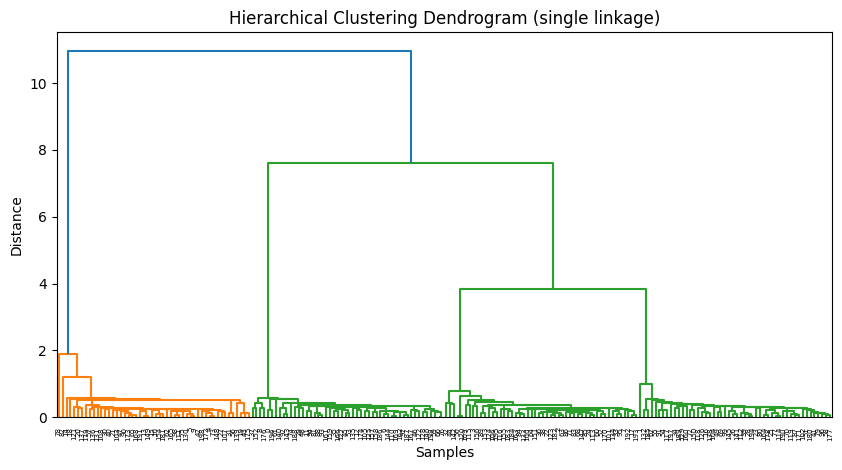

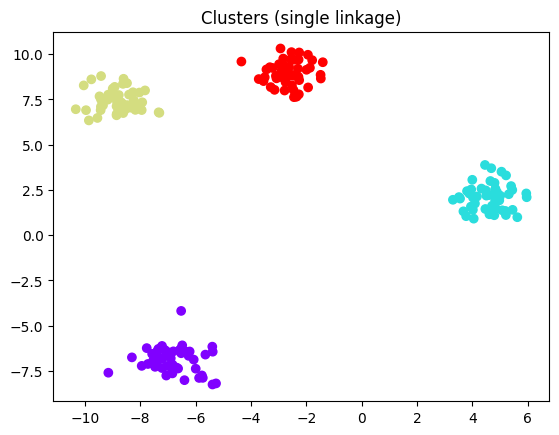

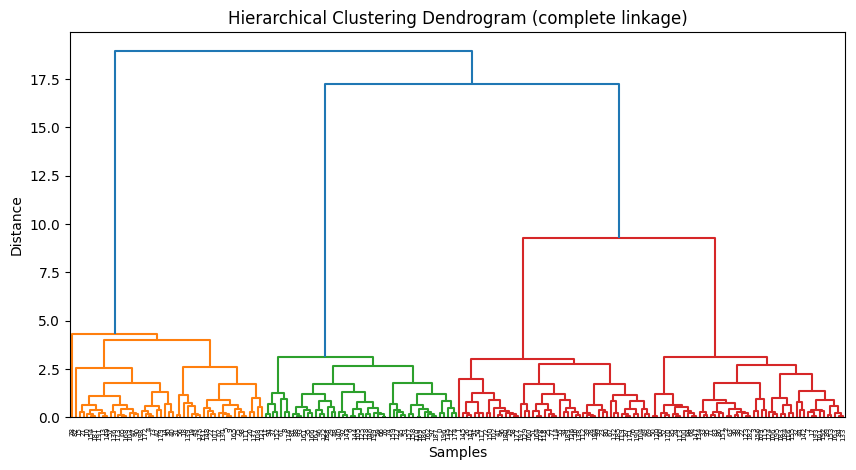

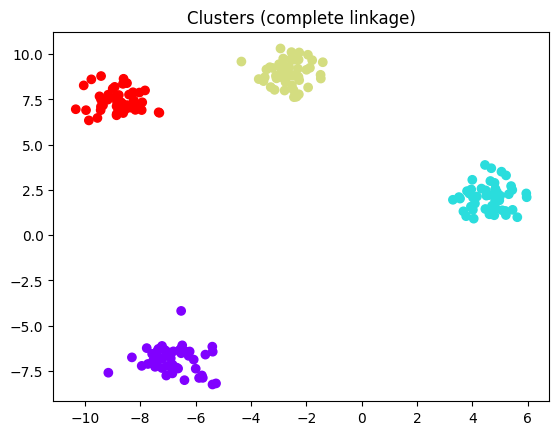

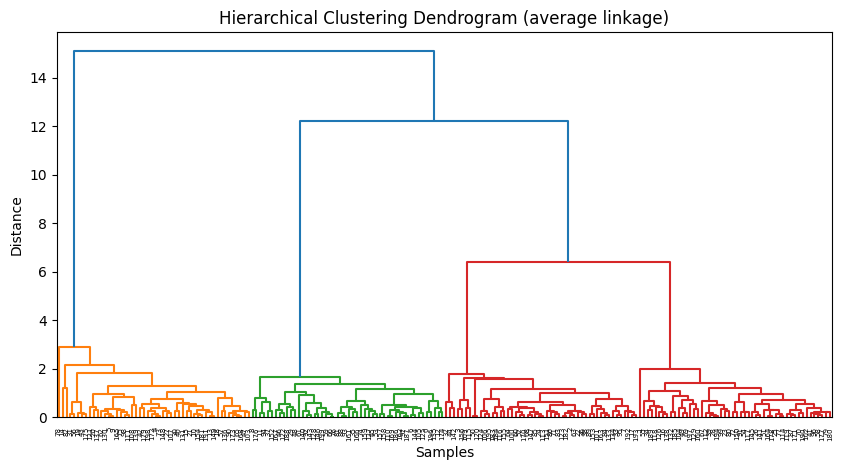

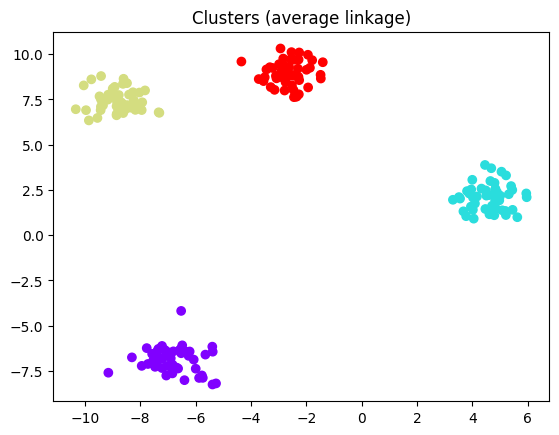

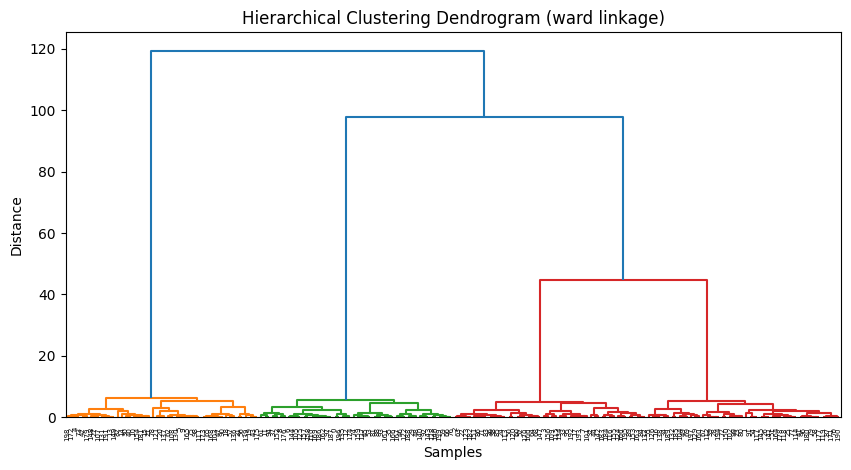

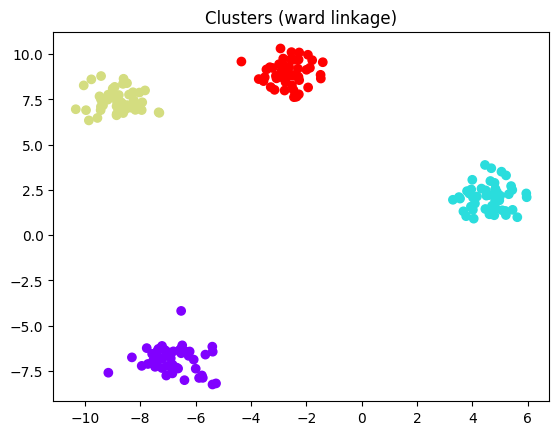

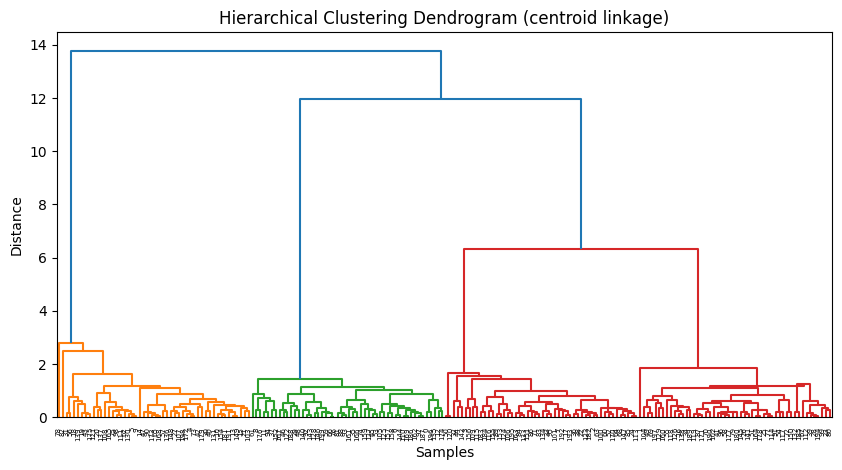

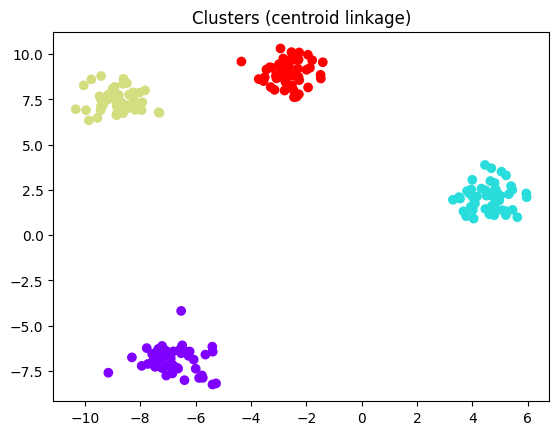

In [40]:
labels_single = hierarchical_clustering(X, method='single')
labels_complete = hierarchical_clustering(X, method='complete')
labels_average = hierarchical_clustering(X, method='average')
labels_ward = hierarchical_clustering(X, method='ward')
labels_centroid = hierarchical_clustering(X, method='centroid')

5.Implement DBSCAN clustering

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

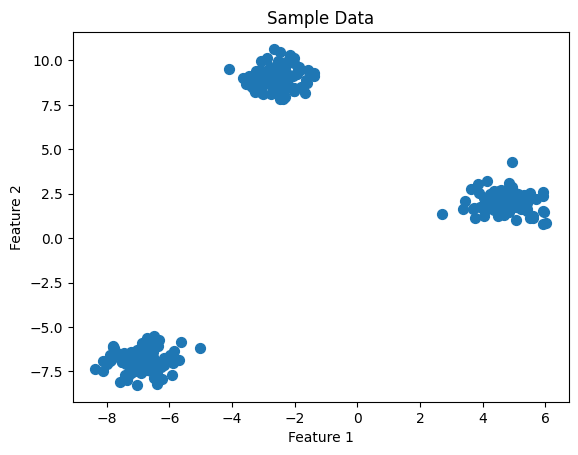

In [42]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [43]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)


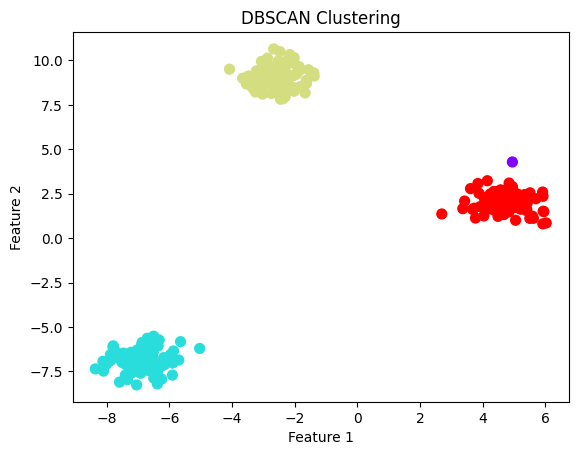

Number of clusters: 3
Number of noise points: 1


In [44]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


6.Implement Spectral Clustering

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

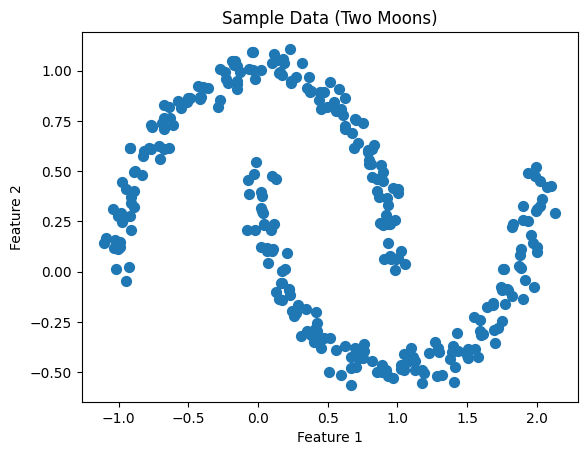

In [46]:
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Sample Data (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [47]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


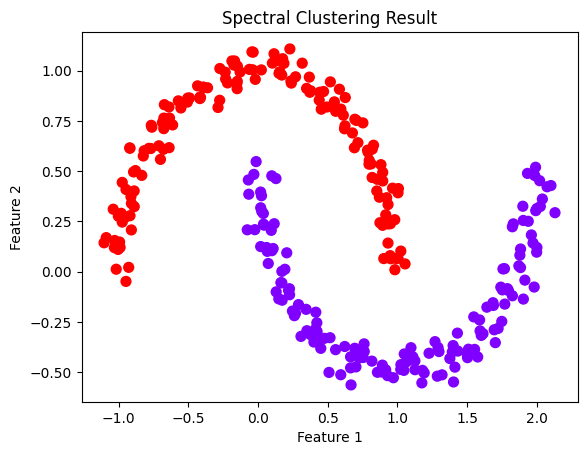

In [48]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Spectral Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()